In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

## Pandas 자료 다루기

>### 공분산과 상관계수
- 두 변수의 선형관계를 나타내는 공분산과 상관계수

In [5]:
steel = np.loadtxt('./data/Python_Data/ch02_data/steel.txt',
                skiprows=5, delimiter='\t')
df = pd.DataFrame(steel, columns= ['y', 'X1', 'X2'])
df

,y,X1,X2
0,81.4,195.0,57.0
1,122.2,179.0,61.0
2,101.7,205.0,60.0
3,175.6,204.0,62.0
4,150.3,201.0,61.0
5,64.8,184.0,54.0
6,92.1,210.0,58.0
7,113.8,209.0,61.0


In [62]:
# Covariance Table
df.cov()

,y,X1,X2
y,1325.868393,108.855357,85.246429
X1,108.855357,131.982143,11.178571
X2,85.246429,11.178571,7.357143


In [83]:
# std(x) * std(y)
std_x_y = df.std(axis=0).values.reshape(3,1) * df.std(axis=0).values.reshape(1,3) # 3X1 * 1X3 = 3X3
std_x_y

array([[1325.86839286,  418.31919826,   98.76539463],
       [ 418.31919826,  131.98214286,   31.1610571 ],
       [  98.76539463,   31.1610571 ,    7.35714286]])

In [84]:
# It is equal to Correlation Table
df.cov() / std_x_y

,y,X1,X2
y,1.000000,0.260221,0.863120
X1,0.260221,1.000000,0.358735
X2,0.863120,0.358735,1.000000


In [50]:
# Correlation Table
df.corr()

,y,X1,X2
y,1.000000,0.260221,0.863120
X1,0.260221,1.000000,0.358735
X2,0.863120,0.358735,1.000000


>### Correlation Table 시각화
1. pandas style
2. pandas plotting sactter_matrix
2. matplotlib imshow
3. seaborn heatmap

In [58]:
df.corr().style.background_gradient(cmap='coolwarm').set_precision(4)

,y,X1,X2
y,1,0.2602,0.8631
X1,0.2602,1,0.3587
X2,0.8631,0.3587,1


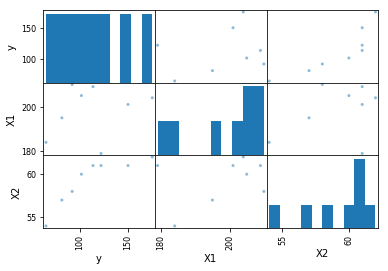

In [59]:
pd.plotting.scatter_matrix(df)
plt.show()

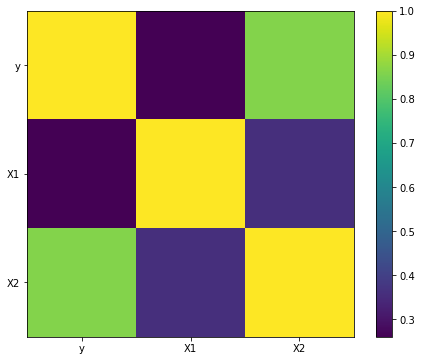

In [60]:
cm = plt.cm.get_cmap('RdYlBu')
fig, ax = plt.subplots(figsize=(8, 6))
sc = ax.imshow(df.corr())
fig.colorbar(sc)
ax.set_xticks(np.arange(len(df.corr())))
ax.set_yticks(np.arange(len(df.corr())))
ax.set_xticklabels(list(df.columns))
ax.set_yticklabels(list(df.columns))
plt.draw()

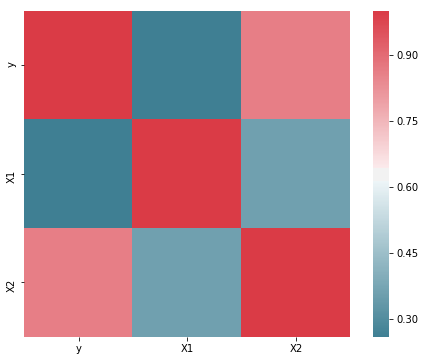

In [61]:
f, ax = plt.subplots(figsize=(8, 6))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), 
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

>### 유일한 값, 값 세기
    - isin()
    - unique()
    - value_counts()
- **Data size가 커질 때 boolean index로 접근하는 것이 빠른지 method를 사용하는 것이 빠른지 체크 필수**

In [90]:
s = pd.Series([22,13,14,22,14,11,14])
s

0    22
1    13
2    14
3    22
4    14
5    11
6    14
dtype: int64

>#### isin()
 - TypeError: only list-like objects are allowed to be passed to isin(), you passed a [int]
 - input으로 list-like object를 넣어줘야만 함

In [92]:
try: 
    s.isin(22)
except TypeError as e:
    print('TypeErrpr:', e)

TypeErrpr: only list-like objects are allowed to be passed to isin(), you passed a [int]


In [93]:
s.isin([22])

0     True
1    False
2    False
3     True
4    False
5    False
6    False
dtype: bool

>#### unique()
- series의 유일한 값들을 출력

In [99]:
s.unique()

array([22, 13, 14, 11], dtype=int64)

>#### value_counts()
- 각 instance가 몇 개씩 있는지 return
- nominal 변수에 주로 사용

In [98]:
s.value_counts()

14    3
22    2
13    1
11    1
dtype: int64

In [101]:
data = {'att':[5,7,4,7],
        'hw':[7,9,8,6],
        'mid':[28,3,7,7],
        'low':[9,9,8,5]}
data = pd.DataFrame(data)
data

,att,hw,low,mid
0,5,7,9,28
1,7,9,9,3
2,4,8,8,7
3,7,6,5,7


In [107]:
data.apply(pd.value_counts).fillna('-')

,att,hw,low,mid
3,-,-,-,1
4,1,-,-,-
5,1,-,1,-
6,-,1,-,-
7,2,1,-,2
8,-,1,1,-
9,-,1,2,-
28,-,-,-,1


>### 누락된 데이터 처리
- 기술통계량에서 누락된 값은 제외하고 연산
- pandas에서 누락된 데이터는 NaN으로 취급
- 파이썬의 내장 None 값 또한 NA값으로 취급
- NA 처리 메서드
        - dropna()
        - fillna()
        - isnull()
        - notnull()

> #### insull & dropna
- isnull : 값이 NaN인지 아닌지 Boolean을 return
- dropna : NaN값을 조건에 맞춰 제거

In [109]:
s = pd.Series(['kim', np.nan, 'lee', None, 'cho', 'bae'])
s

0     kim
1     NaN
2     lee
3    None
4     cho
5     bae
dtype: object

In [110]:
s.isnull()

0    False
1     True
2    False
3     True
4    False
5    False
dtype: bool

In [111]:
s.dropna()

0    kim
2    lee
4    cho
5    bae
dtype: object

In [113]:
data = pd.DataFrame(
    {'att':[10,9,np.nan,10,8],
     'hw':[10,8,np.nan,np.nan,9],
     'mid':[np.nan,29,np.nan,27,30],
     'fin':[29,35,np.nan,35,27]}
)
data

,att,fin,hw,mid
0,10.0,29.0,10.0,NaN
1,9.0,35.0,8.0,29.0
2,NaN,NaN,NaN,NaN
3,10.0,35.0,NaN,27.0
4,8.0,27.0,9.0,30.0


In [117]:
data.dropna() # NaN이 있는 행 제거

,att,fin,hw,mid
1,9.0,35.0,8.0,29.0
4,8.0,27.0,9.0,30.0


In [118]:
data.dropna(axis=1) # NaN이 있는 열 제거

""
0
1
2
3
4


In [120]:
data.dropna(how='all') # 전부 NaN값인 행 제거

,att,fin,hw,mid
0,10.0,29.0,10.0,NaN
1,9.0,35.0,8.0,29.0
3,10.0,35.0,NaN,27.0
4,8.0,27.0,9.0,30.0


In [122]:
data.dropna(axis=1, thresh=4) # 값이 4개 이상 입력된 열만 출력

,att,fin
0,10.0,29.0
1,9.0,35.0
2,NaN,NaN
3,10.0,35.0
4,8.0,27.0


>#### fillna()
- fillna : NaN인 값을 다른 값으로 채워넣음

In [129]:
s = pd.Series([10,np.nan,5,5,np.nan,np.nan,np.nan,7,8,np.nan,17,np.nan])
s

0     10.0
1      NaN
2      5.0
3      5.0
4      NaN
5      NaN
6      NaN
7      7.0
8      8.0
9      NaN
10    17.0
11     NaN
dtype: float64

In [132]:
s.fillna(-1)

0     10.0
1     -1.0
2      5.0
3      5.0
4     -1.0
5     -1.0
6     -1.0
7      7.0
8      8.0
9     -1.0
10    17.0
11    -1.0
dtype: float64

In [131]:
s.fillna(method='ffill', limit=1) # forward filling, 최대 1개까지만

0     10.0
1     10.0
2      5.0
3      5.0
4      5.0
5      NaN
6      NaN
7      7.0
8      8.0
9      8.0
10    17.0
11    17.0
dtype: float64

In [133]:
s.fillna(method='bfill', limit=2) # backward filling, 최대 2개까지만

0     10.0
1      5.0
2      5.0
3      5.0
4      NaN
5      7.0
6      7.0
7      7.0
8      8.0
9     17.0
10    17.0
11     NaN
dtype: float64

In [134]:
data

,att,fin,hw,mid
0,10.0,29.0,10.0,NaN
1,9.0,35.0,8.0,29.0
2,NaN,NaN,NaN,NaN
3,10.0,35.0,NaN,27.0
4,8.0,27.0,9.0,30.0


In [135]:
data.fillna(-1)

,att,fin,hw,mid
0,10.0,29.0,10.0,-1.0
1,9.0,35.0,8.0,29.0
2,-1.0,-1.0,-1.0,-1.0
3,10.0,35.0,-1.0,27.0
4,8.0,27.0,9.0,30.0


In [138]:
data.fillna({'att':'=', 'mid':-5}) # dict 자료형을 사용하여 열별로 다른 값으로 채워넣기

,att,fin,hw,mid
0,10,29.0,10.0,-5.0
1,9,35.0,8.0,29.0
2,=,NaN,NaN,-5.0
3,10,35.0,NaN,27.0
4,8,27.0,9.0,30.0


In [142]:
data.fillna(data.mean()) # 평균값으로 채워넣기

,att,fin,hw,mid
0,10.00,29.0,10.0,28.666667
1,9.00,35.0,8.0,29.000000
2,9.25,31.5,9.0,28.666667
3,10.00,35.0,9.0,27.000000
4,8.00,27.0,9.0,30.000000


>### Hierarchical indexing
- 계층적 색인
- 축에 대해서 2개 이상의 다중 색인 지정

In [145]:
bi10_data = np.random.binomial(n=10, p=.4, size=10)
s = pd.Series(bi10_data,
             index = [['stat','stat','stat','econ','econ',
                       'comp','comp','comp','math','math'],
                      [1,2,3,1,2,2,3,4,3,4]])
s, s.index

(stat  1    3
       2    5
       3    3
 econ  1    5
       2    6
 comp  2    5
       3    5
       4    5
 math  3    1
       4    5
 dtype: int32,
 MultiIndex(levels=[['comp', 'econ', 'math', 'stat'], [1, 2, 3, 4]],
            labels=[[3, 3, 3, 1, 1, 0, 0, 0, 2, 2], [0, 1, 2, 0, 1, 1, 2, 3, 2, 3]]))

In [149]:
s[['comp','math']]

comp  2    5
      3    5
      4    5
math  3    1
      4    5
dtype: int32

In [151]:
s.unstack() # 중첩 해제

,1,2,3,4
comp,NaN,5.0,5.0,5.0
econ,5.0,6.0,NaN,NaN
math,NaN,NaN,1.0,5.0
stat,3.0,5.0,3.0,NaN


In [153]:
s.unstack().stack() # 중첩 설정

comp  2    5.0
      3    5.0
      4    5.0
econ  1    5.0
      2    6.0
math  3    1.0
      4    5.0
stat  1    3.0
      2    5.0
      3    3.0
dtype: float64

In [155]:
np.random.seed(123789)
data = np.random.binomial(n=10, p=.5, size=40).reshape(10, 4)
data

array([[3, 3, 5, 8],
       [4, 4, 5, 8],
       [3, 4, 7, 7],
       [6, 6, 4, 6],
       [5, 2, 6, 5],
       [5, 7, 7, 5],
       [8, 5, 5, 5],
       [3, 7, 3, 7],
       [5, 6, 4, 3],
       [9, 2, 6, 5]])

In [158]:
df = pd.DataFrame(data,
                  index=[['stat','stat','stat','econ','econ',
                       'comp','comp','comp','math','math'],
                      [1,2,3,1,2,2,3,4,3,4]],
                  columns=[['서울','서울','경기','경기'],
                           ['M','F','M','F']])
df.index.names = ['dept', 'cls']
df.columns.names = ['area', 'gender']
df

area     서울    경기   
gender    M  F  M  F
dept cls            
stat 1    3  3  5  8
     2    4  4  5  8
     3    3  4  7  7
econ 1    6  6  4  6
     2    5  2  6  5
comp 2    5  7  7  5
     3    8  5  5  5
     4    3  7  3  7
math 3    5  6  4  3
     4    9  2  6  5

In [159]:
df.loc['stat']

area   서울    경기   
gender  M  F  M  F
cls               
1       3  3  5  8
2       4  4  5  8
3       3  4  7  7

In [160]:
df.loc['stat']

area   서울    경기   
gender  M  F  M  F
cls               
1       3  3  5  8
2       4  4  5  8
3       3  4  7  7

In [163]:
df.loc['econ','서울']['F']

cls
1    6
2    2
Name: F, dtype: int32

In [167]:
df.swaplevel(i=1, j=0).sort_index() # swap levels

area     서울    경기   
gender    M  F  M  F
cls dept            
1   econ  6  6  4  6
    stat  3  3  5  8
2   comp  5  7  7  5
    econ  5  2  6  5
    stat  4  4  5  8
3   comp  8  5  5  5
    math  5  6  4  3
    stat  3  4  7  7
4   comp  3  7  3  7
    math  9  2  6  5

In [181]:
df.sum(axis=0) # 행을 합침 -> 열이 남음

area  gender
서울    M         51
      F         46
경기    M         52
      F         59
dtype: int64

In [182]:
df.sum(axis=1) # 열을 합침 -> 행이 남음

dept  cls
stat  1      19
      2      21
      3      21
econ  1      22
      2      18
comp  2      24
      3      23
      4      20
math  3      18
      4      22
dtype: int64

In [185]:
df.sum(level=0) 
# axis 설정없이 level을 건드리면 default가 axis=0이기 때문에 행의 level을 따름

area    서울      경기    
gender   M   F   M   F
dept                  
stat    10  11  17  23
econ    11   8  10  11
comp    16  19  15  17
math    14   8  10   8

In [186]:
df.sum(axis=1, level=0) # 열로 건드리고 싶다면 axis=1로 옵션을 바꿔주면 된다.

area      서울  경기
dept cls        
stat 1     6  13
     2     8  13
     3     7  14
econ 1    12  10
     2     7  11
comp 2    12  12
     3    13  10
     4    10  10
math 3    11   7
     4    11  11

In [193]:
df.sum(level='cls')

area    서울      경기    
gender   M   F   M   F
cls                   
1        9   9   9  14
2       14  13  18  18
3       16  15  16  15
4       12   9   9  12

In [196]:
df.describe()

area           서울                    경기           
gender          M          F          M          F
count   10.000000  10.000000  10.000000  10.000000
mean     5.100000   4.600000   5.200000   5.900000
std      2.078995   1.897367   1.316561   1.595131
min      3.000000   2.000000   3.000000   3.000000
25%      3.250000   3.250000   4.250000   5.000000
50%      5.000000   4.500000   5.000000   5.500000
75%      5.750000   6.000000   6.000000   7.000000
max      9.000000   7.000000   7.000000   8.000000

>#### DataFrame의 열을 사용한 계층적 색인
    - set_index() 메서드를 사용하여 열 색인을 행으로 옮기기
    - reset_index() 메서드를 사용하여 열 색인을 행으로 옮기기

In [220]:
np.random.seed(123789)
data = np.random.binomial(n=10, p=.5, size=30).reshape(10,-1)
df = pd.DataFrame(data, columns = ['V1','V2','V3'])
df['V4'] = np.where(np.random.random(10) > .5, "M", "F")
df

,V1,V2,V3,V4
0,3,3,5,F
1,8,4,4,M
2,5,8,3,M
3,4,7,7,M
4,6,6,4,F
5,6,5,2,F
6,6,5,5,M
7,7,7,5,F
8,8,5,5,M
9,5,3,7,F


In [222]:
df.set_index(['V2', 'V4']).sort_index()

V1  V3
V2 V4        
3  F    3   5
   F    5   7
4  M    8   4
5  F    6   2
   M    6   5
   M    8   5
6  F    6   4
7  F    7   5
   M    4   7
8  M    5   3

In [223]:
df.set_index(['V2', 'V4']).sort_index().reset_index('V4')

,V4,V1,V3
V2,,,
3,F,3,5
3,F,5,7
4,M,8,4
5,F,6,2
5,M,6,5
5,M,8,5
6,F,6,4
7,F,7,5
7,M,4,7


## 자료 불러오기, 저장하기와 자료 다듬기, 변형, 병합

## 텍스트 파일 불러오기와 저장하기
>### 텍스트 파일 불러오기
- Pandas는 표 형식의 자료를 DataFrame 객체로 읽어오는 몇 가지 함수를 제공
        read_csv()
            - 파일 또는 파일 URL로부터 구분자를 포함한 데이터 읽기 (default==",")
        read_table()
            - 파일 또는 파일 URL로부터 구분자를 포함한 데이터 읽기 (default=="\t")
        read_fwf()
            - 고정 열 입력방식 데이터를 읽기
        read_clipboard()
            - 클립보드에 있는 데이터를 읽어오는 read_table 함수 
            - 웹페이지의 표 가져오기에 유용
    - read_csv를 일반적으로 많이 사용
    - 옵션
        - path : 파일 위치와 파일 이름
        - sep or delimiter : 열을 구분하기 위해 사용할 문자
        - header : 열 이름(색인)으로 사용할 skip 이후 줄 번호 (기본값 : 0), 헤더가 없으면 None
        - index_col : 행 인덱스로 사용할 열 번호 또는 이름 또는 리스트
        - names : 열 이름으로 사용할 리스트 (header=None일 때 사용)
        - skipwos : 무시할 행의 수, 또는 행 번호가 담긴 리스트
        - na_values : NA 값으로 처리할 값
        - comment : 주석으로 분류되어 파싱하지 않을 문자열
        - parse_data : 날짜를 datetime으로 변활할지 여부 (기본값 : False)
            - [1,2,3]은 각각의 열을 datetime으로 변환
            - [[1,3]]은 1열과 3열을 조합하여 하나의 datetime으로 변환
        - keep_date_col : 여러 열을 datetime으로 변활했을 때 원래 열을 남겨둘지 여부 (기본값 : False)
        - convertes : 열에 적용할 함수를 지정
            - {"age":f}는 "age"열에 f 함수를 적용 (사전의 키는 열 이름이나 번호)
        - date_parser : 날짜 변환 시 사용할 함수
        - nrows : 파일을 몇 줄을 읽을 것인지 지정
        - skip_footnote : 무시할 파일의 마지막 줄
        - encoding : 유니코드 인코딩 종류를 지정
        - thousands : 숫자의 천 단위 구분기호 (","와 같은 구분자)

In [226]:
pd.read_csv('./data/Python_Data/ch02_data/APT.csv', header=0,
            skiprows=7, index_col='id', encoding='utf-8').head()

,Area,UseDistrict,Option,FAR,Price
id,,,,,
apt01,도심권,제2종 일반주거지역,풀옵션형,132.72,515.0519492
apt02,도심권,제2종 일반주거지역,풀옵션형,184.99,
apt03,,상업지역,기본형,,364.3195349
apt04,도심권,상업지역,풀옵션형,493.08,410.9455297
apt05,도심권,준주거지역,기본형,349.65,616.9759862


In [229]:
pd.read_csv('./data/Python_Data/ch02_data/APT.csv', header=0,
            skiprows=7, index_col='id', encoding='utf-8', na_values={" ",""}).head()

,Area,UseDistrict,Option,FAR,Price
id,,,,,
apt01,도심권,제2종 일반주거지역,풀옵션형,132.72,515.051949
apt02,도심권,제2종 일반주거지역,풀옵션형,184.99,NaN
apt03,NaN,상업지역,기본형,NaN,364.319535
apt04,도심권,상업지역,풀옵션형,493.08,410.945530
apt05,도심권,준주거지역,기본형,349.65,616.975986


In [231]:
pd.read_csv('./data/Python_Data/ch02_data/APT.csv', header=None,
            names=['V1','V2','V3','V4','V5'], skiprows=10, nrows=10, 
            index_col=0, encoding='utf-8', na_values={" ",""})

,V1,V2,V3,V4,V5
apt03,NaN,상업지역,기본형,NaN,364.319535
apt04,도심권,상업지역,풀옵션형,493.08,410.945530
apt05,도심권,준주거지역,기본형,349.65,616.975986
apt06,도심권,제3종 일반주거지역,풀옵션형,.,469.151797
apt07,도심권,제3종 일반주거지역,풀옵션형,227.2,576.476262
apt08,도심권,상업지역,풀옵션형,254.37,355.871886
apt09,동북권,NaN,기본형,199.93,423.812340
apt10,동북권,제2종 일반주거지역,풀옵션형,198.13,518.313753
apt11,동북권,제2종 일반주거지역,풀옵션형,199.34,615.763547
apt12,동북권,제3종 일반주거지역,풀옵션형,195.22,455.030217


>### 텍스트 파일 저장하기
- 텍스트 파일을 불러오는 것과 같이 데이터를 구분자 형식으로 텍스트 파일 저장
        - to_csv : 데이터프레임을 구분자 형식의 파일로 저장 (기본 구분자 : ',')
- 옵션
    - path : 파일 위치와 파일 이름
    - sep or delimiter : 열을 구분하기 우해 사용할 문자
    - na_rep : 누락된 값을 원하는 값으로 지정 (기본적으로 누락된 값은 빈 문자열)
    - index : 행 이름의 포함 여부 (기본값 : True)
    - header : 열 이름 포함 여부 (기본값 : True)
    - columns : 내보낼 열 이름을 리스트로 지정

In [235]:
df = pd.read_csv('./data/Python_Data/ch02_data/APT.csv', header=None,
            names=['V1','V2','V3','V4','V5'], skiprows=10, nrows=10, 
            index_col=0, encoding='utf-8', na_values={" ",""})

In [236]:
df.to_csv('./data/Python_Data/ch02_data/APTsave.txt', sep='|',
        na_rep='Null', index=False, header=True, columns=['V1','V4','V5'])

## 데이터 합치기
>### 데이터 합치기
- 객체에 저장된 데이터를 합치기 위해 pandas 내장 함수를 이용
        - merge()
            - 하나 이상의 키를 기준으로 DataFrame의 행 합치기
            - 관계형 데이터 베이스의 JOIN과 유사
- 옵션
    - left : 결합할 왼쪽 DataFrame
    - right : 결합할 오른쪽 DataFrame
    - how : 결합 방법
        - left : 왼쪽의 모든 데이터 결합
        - right : 오른쪽의 모든 데이터 결합
        - outer : 양쪽의 모든 데이터 결합
        - inner : 양쪽에 기준 값이 모두 있는 경우 교차하여 결합 (default)
    - on : 결합할 양쪽 DataFrame의 기준 변수
    - left_on : 결합할 왼쪽 DataFrame의 기준 변수
    - right_on : 결합할 오른쪽 DataFrame의 기준 변수

In [237]:
df1 = pd.DataFrame(
    {'key':['b','b','a','c','a','a','b'],
     'V1':range(7)}
)
df2 = pd.DataFrame(
    {'key':['a','b','d'],
     'V2':range(2,5)}
)

In [238]:
df1

,V1,key
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [239]:
df2

,V2,key
0,2,a
1,3,b
2,4,d


In [242]:
pd.merge(df1, df2)

,V1,key,V2
0,0,b,3
1,1,b,3
2,6,b,3
3,2,a,2
4,4,a,2
5,5,a,2


In [244]:
df3 = df2
df3.columns = ['V2','key2']
df3

,V2,key2
0,2,a
1,3,b
2,4,d


In [245]:
pd.merge(df1, df3, left_on='key', right_on='key2')

,V1,key,V2,key2
0,0,b,3,b
1,1,b,3,b
2,6,b,3,b
3,2,a,2,a
4,4,a,2,a
5,5,a,2,a


In [246]:
pd.merge(df1, df3, left_on='key', right_on='key2',
         how='outer')

,V1,key,V2,key2
0,0.0,b,3.0,b
1,1.0,b,3.0,b
2,6.0,b,3.0,b
3,2.0,a,2.0,a
4,4.0,a,2.0,a
5,5.0,a,2.0,a
6,3.0,c,NaN,NaN
7,NaN,NaN,4.0,d


In [250]:
df1 = pd.DataFrame(
    {'key1':['stat','stat','stat','math','math','math'],
     'key2':[1,2,3,1,2,4],
     'V1':range(6)}
)
df2 = pd.DataFrame(
    {'key1':['stat','stat','econ','math','math'],
     'key2':[1,2,0,1,4],
     'V2':range(10, 15)}
)

In [251]:
df1

,V1,key1,key2
0,0,stat,1
1,1,stat,2
2,2,stat,3
3,3,math,1
4,4,math,2
5,5,math,4


In [252]:
df2

,V2,key1,key2
0,10,stat,1
1,11,stat,2
2,12,econ,0
3,13,math,1
4,14,math,4


In [255]:
pd.merge(df1, df2, on=['key1','key2'],
         how='outer', sort=True)

,V1,key1,key2,V2
0,NaN,econ,0,12.0
1,3.0,math,1,13.0
2,4.0,math,2,NaN
3,5.0,math,4,14.0
4,0.0,stat,1,10.0
5,1.0,stat,2,11.0
6,2.0,stat,3,NaN


In [256]:
df1 = pd.DataFrame(
    {'key1':['b','b','a','c','a','a','b'],
     'V1':range(7)}
)
df2 = pd.DataFrame(
    {'V1':range(10, 13),
     'V2':range(2,5)},
    index = ['a','b','d']
)

In [257]:
df1

,V1,key1
0,0,b
1,1,b
2,2,a
3,3,c
4,4,a
5,5,a
6,6,b


In [258]:
df2

,V1,V2
a,10,2
b,11,3
d,12,4


In [260]:
# right_index = True
pd.merge(df1, df2, left_on=['key1'], right_index=True, how='outer', sort=True)

,V1_x,key1,V1_y,V2
2,2.0,a,10.0,2.0
4,4.0,a,10.0,2.0
5,5.0,a,10.0,2.0
0,0.0,b,11.0,3.0
1,1.0,b,11.0,3.0
6,6.0,b,11.0,3.0
3,3.0,c,NaN,NaN
6,NaN,d,12.0,4.0


In [261]:
# 만일 위의 경우에서 right_index=False라면?
pd.merge(df1, df2, left_on=['key1'], how='outer', sort=True)

TypeError: object of type 'NoneType' has no len()

>#### Index를 활용한 데이터 합치기

In [262]:
df1 = pd.DataFrame(
    {'V1':range(7)},
    index=['b','b','a','c','a','a','b']
)
df2 = pd.DataFrame(
    {'V1':range(10, 13),
     'V2':range(2,5)},
    index=['a','b','c']
)

In [263]:
df1

,V1
b,0
b,1
a,2
c,3
a,4
a,5
b,6


In [264]:
df2

,V1,V2
a,10,2
b,11,3
c,12,4


In [265]:
df1.join(df2, lsuffix='_left', rsuffix='_right', how='outer')

,V1_left,V1_right,V2
a,2,10,2
a,4,10,2
a,5,10,2
b,0,11,3
b,1,11,3
b,6,11,3
c,3,12,4


>### 축에 따라 데이터 붙이기
- Numpy의 배열을 연결하는 concatenate 함수와 유사
        concat()
            - 하나의 축을 따라 객체를 이어 붙이기
- 옵션
    - objs : 이어붙일 pandas 객체의 리스트나 사진
    - axis : 이어붙일 축 방향 (기본값 : 0, 행)
    - join : 결합방식 (inner, left, right, outer)
    - join_axes : 합집합/교집합을 수행하는 대신 n-1축으로 사용할 색인 지정
    - keys : 이어붙일 객체나 이어붙인(행 결합) 객체에 중복되는 색인이 있는지 검사하고 있다면 예외 발생
    - ignore_index : 이어붙인 pandas 객체 축의 색인을 유지하지 않고 range(total length)로 새로운 색인 생성

In [266]:
s1 = pd.Series([0,2,3], index=['a','b','c'])
s2 = pd.Series([2,3,4,5], index=['a','c','d','e'])
s3 = pd.Series([1,3], index=['e','f'])

In [267]:
pd.concat([s1,s2,s3])

a    0
b    2
c    3
a    2
c    3
d    4
e    5
e    1
f    3
dtype: int64

In [268]:
pd.concat([s1,s2,s3], axis=1)

,0,1,2
a,0.0,2.0,NaN
b,2.0,NaN,NaN
c,3.0,3.0,NaN
d,NaN,4.0,NaN
e,NaN,5.0,1.0
f,NaN,NaN,3.0


In [270]:
pd.concat([s1,s2], axis=1, join='outer') # default

,0,1
a,0.0,2.0
b,2.0,NaN
c,3.0,3.0
d,NaN,4.0
e,NaN,5.0


In [271]:
pd.concat([s1,s2],axis=1, join='inner')

,0,1
a,0,2
c,3,3


In [273]:
pd.concat([s1,s2], axis=1, join_axes=[['a','b','e']]) # 열 결합시 join할 행 선택

,0,1
a,0.0,2.0
b,2.0,NaN
e,NaN,5.0


In [276]:
pd.concat([s1,s2,s3], axis=0, keys=['S1','S2','S3']) # 행 결합(이어 연결하기)에서 계층 색인 생성

S1  a    0
    b    2
    c    3
S2  a    2
    c    3
    d    4
    e    5
S3  e    1
    f    3
dtype: int64

In [278]:
pd.concat([s1,s2,s3], axis=1, keys=['V1','V2','V3']) # 시리즈 이름이 없을 시, 혹은 새로 부여할 때 열 index 생성

,V1,V2,V3
a,0.0,2.0,NaN
b,2.0,NaN,NaN
c,3.0,3.0,NaN
d,NaN,4.0,NaN
e,NaN,5.0,1.0
f,NaN,NaN,3.0


In [279]:
df1 = pd.DataFrame(np.arange(10, 19).reshape(3,3),
                  index=['a','b','c'],
                  columns=['V1','V2','V3'])
df2 = pd.DataFrame(np.arange(100, 104).reshape(2,2),
                  index=['a','d'],
                  columns=['X1','X2'])

In [280]:
df1

,V1,V2,V3
a,10,11,12
b,13,14,15
c,16,17,18


In [281]:
df2

,X1,X2
a,100,101
d,102,103


In [282]:
pd.concat((df1,df2), axis=0)

,V1,V2,V3,X1,X2
a,10.0,11.0,12.0,NaN,NaN
b,13.0,14.0,15.0,NaN,NaN
c,16.0,17.0,18.0,NaN,NaN
a,NaN,NaN,NaN,100.0,101.0
d,NaN,NaN,NaN,102.0,103.0


In [283]:
pd.concat((df1,df2), axis=0, ignore_index=True)

,V1,V2,V3,X1,X2
0,10.0,11.0,12.0,NaN,NaN
1,13.0,14.0,15.0,NaN,NaN
2,16.0,17.0,18.0,NaN,NaN
3,NaN,NaN,NaN,100.0,101.0
4,NaN,NaN,NaN,102.0,103.0


In [284]:
pd.concat([df1,df2], axis=1)

,V1,V2,V3,X1,X2
a,10.0,11.0,12.0,100.0,101.0
b,13.0,14.0,15.0,NaN,NaN
c,16.0,17.0,18.0,NaN,NaN
d,NaN,NaN,NaN,102.0,103.0


In [285]:
pd.concat([df1,df2], axis=1, keys=['DF1', 'DF2'], names=['f','s'])

f   DF1                DF2       
s    V1    V2    V3     X1     X2
a  10.0  11.0  12.0  100.0  101.0
b  13.0  14.0  15.0    NaN    NaN
c  16.0  17.0  18.0    NaN    NaN
d   NaN   NaN   NaN  102.0  103.0

## 데이터 변형
>### 중복제거
- Dataframe에서 중복된 행을 확인하여 삭제
        duplicated()
            - 각 행이 중복인지 아닌지 확인
        drop_duplocates()
            - 중복된 행을 하나만 남기고 삭제
- 옵션
    - subset : 종복을 체그할 열 이름 (생략하면 모든 열)
    - keep : first 또는 last를 제외하고 중복 값을 True로 표기하거나 제거

In [289]:
df = pd.DataFrame(
    np.array([['kim','kim','lee','lee','lee','kim'],
           [1,2,2,2,3,1]]).T, columns=['name', 'score'])
df

,name,score
0,kim,1
1,kim,2
2,lee,2
3,lee,2
4,lee,3
5,kim,1


In [290]:
df.duplicated(subset='name') # 위에서부터 내려온다

0    False
1     True
2    False
3     True
4     True
5     True
dtype: bool

In [293]:
df.duplicated(subset='name', keep=False)

0    True
1    True
2    True
3    True
4    True
5    True
dtype: bool

In [291]:
df.duplicated(subset='name', keep='last') # 아래서부터 올라간다

0     True
1     True
2     True
3     True
4    False
5    False
dtype: bool

In [294]:
df.drop_duplicates(subset='name')

,name,score
0,kim,1
2,lee,2


>### 함수나 매핑을 이용하여 데이터 변형
- DataFrame의 열이나 Series, 배열 안의 값을 기반으로 데이터의 형태를 변형
- map 메서드는 옵션(인수)으로 사전이나 함수를 받아 자료를 변환

In [298]:
df = pd.DataFrame(
    {'name':['kim','lee','bae','cho','kang'],
     'sex':[1,2,2,1,1],
     'home':['마포','수지','기흥','용산','종로'],
     'income':[250,195,325,210,274]}
)
df

,home,income,name,sex
0,마포,250,kim,1
1,수지,195,lee,2
2,기흥,325,bae,2
3,용산,210,cho,1
4,종로,274,kang,1


In [302]:
num_to_str = {1:'남',2:'여'}
to_city = {'마포':'서울',
           '수지':'용인',
           '기흥':'용인',
           '용산':'서울',
           '종로':'서울'}
def income_group(series):
    return np.where(series > 300, 1, np.where(series > 220, 2, 3))
f = lambda x : x * .015 if x > 240 else np.nan

df['gender'] = df['sex'].map(num_to_str)
df['city'] = df['home'].map(to_city)
df['remium'] = df['income'].map(f)
df['income_group'] = df['income'].map(income_group)
df

,home,income,name,sex,gender,city,remium,income_group
0,마포,250,kim,1,남,서울,3.750,2
1,수지,195,lee,2,여,용인,NaN,3
2,기흥,325,bae,2,여,용인,4.875,1
3,용산,210,cho,1,남,서울,NaN,3
4,종로,274,kang,1,남,서울,4.110,2


>### 값 치환하기
- fillna 메서드오 같은 특정한 값을 다른 값들로 채우기 위한 작업
- map 메서드는 한 객체 안에서 값의 부분집합을 변경하는데 사용
- replace 메서드는 특정한 값을 지정하여 변경

In [305]:
df1 = df.replace({
    'income_group' : {1:'High', 2:'Middle', 3:'Low'},
    'gender' : {'남':'남성', '여':'여성'},
    'name' : {'kim':'김', 'lee':'이'},
    'remium' : {np.nan:np.inf}
})
df1

,home,income,name,sex,gender,city,remium,income_group
0,마포,250,김,1,남성,서울,3.750000,Middle
1,수지,195,이,2,여성,용인,inf,Low
2,기흥,325,bae,2,여성,용인,4.875000,High
3,용산,210,cho,1,남성,서울,inf,Low
4,종로,274,kang,1,남성,서울,4.110000,Middle


In [311]:
df1.index

RangeIndex(start=0, stop=5, step=1)

In [314]:
{i : 'st'+str(i+1) for i in range(5)}.get

<function dict.get>

In [315]:
df1.index = df1.index.map(
    {i : 'st'+str(i+1) for i in range(5)}.get)
df1

# Index가 RangeIndex(start=0, stop=5, step=1)같이 설정되어 있으면
# 위와 같이 get 메서드의 함수 객체를 받아 넘겨줘야 원하는 바를 실행할 수 있다.

,home,income,name,sex,gender,city,remium,income_group
st1,마포,250,김,1,남성,서울,3.750000,Middle
st2,수지,195,이,2,여성,용인,inf,Low
st3,기흥,325,bae,2,여성,용인,4.875000,High
st4,용산,210,cho,1,남성,서울,inf,Low
st5,종로,274,kang,1,남성,서울,4.110000,Middle


In [317]:
df1 = df1.rename(index={'st1':'foreigner'}, columns={'home':'house'})
df1

,house,income,name,sex,gender,city,remium,income_group
foreigner,마포,250,김,1,남성,서울,3.750000,Middle
st2,수지,195,이,2,여성,용인,inf,Low
st3,기흥,325,bae,2,여성,용인,4.875000,High
st4,용산,210,cho,1,남성,서울,inf,Low
st5,종로,274,kang,1,남성,서울,4.110000,Middle


>### 수치 자료의 계급화
- 수치 자료의 도수분포표 등을 작성하기 위해서 계급화(범주화, Categorize)
        cut()
            - 수치 자료를 bins의 범위에 다라서 계급화
- 옵션
    - x : 수치 자료
    - bins : 계급의 구간 하한과 상한 또는 계급의 수
    - right : 계급 범위의 상한값 포함(이하) 또는 미포함(미만) (기본값 : True)
    - labels : 각 계급의 이름 (기본값 : None)
    - include_lowest : 첫 번째 계급의 하한값 포함(이상) 또는 미포함(초과) (기본값 : False)
- 
        qcut()
            - 수치 자료를 각 계급이 모두 동등한 백분율이 되도록 계급화
- 옵션
    - q : 동일한 백분율을 갖게 할 구간의 수
        

In [318]:
np.random.seed(951753)
s = np.random.binomial(n=10, p=.5, size=100)
cls = [0,2,4,6,8,10]
s

array([5, 5, 6, 6, 4, 3, 4, 5, 4, 7, 4, 5, 6, 2, 5, 8, 5, 8, 7, 4, 4, 4,
       2, 4, 6, 7, 2, 5, 5, 3, 6, 6, 5, 4, 6, 6, 5, 4, 6, 5, 3, 6, 1, 3,
       3, 3, 7, 3, 3, 5, 7, 6, 4, 4, 6, 0, 7, 5, 6, 6, 5, 5, 6, 3, 4, 5,
       8, 5, 5, 4, 7, 5, 6, 2, 7, 5, 7, 7, 7, 5, 4, 3, 6, 7, 5, 6, 4, 7,
       4, 4, 7, 3, 5, 6, 7, 6, 4, 3, 3, 4])

In [321]:
s_cls1 = pd.cut(x=s, bins=cls, include_lowest=True, right=True)
s_cls1

[(4.0, 6.0], (4.0, 6.0], (4.0, 6.0], (4.0, 6.0], (2.0, 4.0], ..., (4.0, 6.0], (2.0, 4.0], (2.0, 4.0], (2.0, 4.0], (2.0, 4.0]]
Length: 100
Categories (5, interval[float64]): [(-0.001, 2.0] < (2.0, 4.0] < (4.0, 6.0] < (6.0, 8.0] < (8.0, 10.0]]

In [322]:
pd.value_counts(s_cls1)

(4.0, 6.0]       43
(2.0, 4.0]       33
(6.0, 8.0]       18
(-0.001, 2.0]     6
(8.0, 10.0]       0
dtype: int64

In [323]:
s_cls2 = pd.cut(x=s, bins=4, labels={'class1', 'class2', 'class3', 'class4'})
s_cls2

[class3, class3, class3, class3, class1, ..., class3, class1, class1, class1, class1]
Length: 100
Categories (4, object): [class4 < class1 < class3 < class2]

In [324]:
pd.value_counts(s_cls2)

class3    43
class1    33
class2    18
class4     6
dtype: int64

In [342]:
np.random.seed(951753)
s = np.random.normal(loc=10, scale=3, size=500000) # s ~ N(10, 3**2) 정규확률변수
s

array([16.84597851,  6.29559577, 11.60574851, ...,  9.08214838,
        6.37311279, 12.17863019])

c:\users\affinity\.conda\envs\ds\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


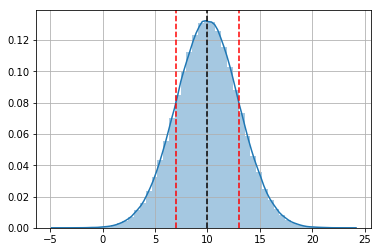

In [388]:
t = sns.distplot(s)
plt.axvline(x=7, linestyle='--', color='r') # mean - std
plt.axvline(x=10, linestyle='--', color='k') # mean
plt.axvline(x=13, linestyle='--', color='r') # mean + std
plt.grid()

In [383]:
s_cls1 = pd.qcut(x=s, q=5) # 각각 동일한 비율을 갖는 6개 계급
s_cls1

[(12.514, 23.515], (-4.2090000000000005, 7.471], (10.754, 12.514], (10.754, 12.514], (7.471, 9.237], ..., (12.514, 23.515], (9.237, 10.754], (7.471, 9.237], (-4.2090000000000005, 7.471], (10.754, 12.514]]
Length: 500000
Categories (5, interval[float64]): [(-4.2090000000000005, 7.471] < (7.471, 9.237] < (9.237, 10.754] < (10.754, 12.514] < (12.514, 23.515]]

In [384]:
pd.value_counts(s_cls1)

(12.514, 23.515]                100000
(10.754, 12.514]                100000
(9.237, 10.754]                 100000
(7.471, 9.237]                  100000
(-4.2090000000000005, 7.471]    100000
dtype: int64

In [385]:
cut_stand = list(set([i.left for i in s_cls1.unique()]).union(set([i.right for i in s_cls1.unique()])))
cut_stand

[7.471, 9.237, 10.754, 12.514, 23.515, -4.2090000000000005]

c:\users\affinity\.conda\envs\ds\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


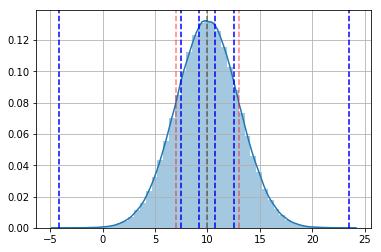

In [389]:
t = sns.distplot(s)
plt.axvline(x=7, linestyle='--', color='r', alpha=.5) # mean - std
plt.axvline(x=10, linestyle='--', color='k', alpha=.5) # mean
plt.axvline(x=13, linestyle='--', color='r', alpha=.5) # mean + std
for i in cut_stand:
    plt.axvline(x=i, linestyle='--', color='b') # mean - std
plt.grid()

# 빨간색 구간 사이사이의 갯수는 전부 50000으로 같다.

>### 특이값 찾기와 제외하기
- 특정한 범위를 벗어나는 값을 찾거나 제외

In [397]:
np.random.seed(91736462) # N(0,1) 표준정규분포 난수 500개
df = pd.DataFrame(np.random.randn(500, 4),
                 columns=['V1','V2','V3','V4'])
df.describe()

,V1,V2,V3,V4
count,500.000000,500.000000,500.000000,500.000000
mean,0.055946,-0.056299,0.065013,0.051037
std,1.014636,1.003898,0.979776,1.049140
min,-2.937363,-3.891728,-2.393556,-3.002839
25%,-0.596259,-0.716414,-0.597514,-0.634482
50%,0.041878,-0.058246,0.058683,0.099479
75%,0.659768,0.656026,0.769493,0.735264
max,3.522552,2.563598,2.991514,3.372619


In [399]:
# V3 열 중에서 -3 미만 또는 3 초과
col = df['V1']
col[np.abs(col) > 3]

239    3.522552
241    3.280426
446    3.449827
Name: V1, dtype: float64

In [405]:
# 변수 중에서 하나라도 -3 미만 또는 3 초과
df[(np.abs(df) > 3).any(axis=1)]

,V1,V2,V3,V4
239,3.522552,1.130870,0.471915,0.015983
241,3.280426,-0.089733,1.261861,1.025020
243,1.333972,-0.375060,0.951164,3.372619
357,0.979220,-3.891728,0.768077,2.361300
379,-1.236223,-3.723089,-0.767469,0.484107
385,-0.089123,-2.227815,-1.374115,-3.002839
446,3.449827,-0.015733,0.326969,-2.912812


In [414]:
# -3 미만 > -3, 3 초과 > 3
df[(np.abs(df) > 3)] = np.sign(df) * 3 # 되게 특이한 방법... 써먹어야겠다.
df.describe()

,V1,V2,V3,V4
count,500.000000,500.000000,500.000000,500.000000
mean,0.053440,-0.053070,0.065013,0.050298
std,1.006770,0.993029,0.979776,1.046889
min,-2.937363,-3.000000,-2.393556,-3.000000
25%,-0.596259,-0.716414,-0.597514,-0.634482
50%,0.041878,-0.058246,0.058683,0.099479
75%,0.659768,0.656026,0.769493,0.735264
max,3.000000,2.563598,2.991514,3.000000


>### 표시자/더미변수
- 각 변수가 갖는 값을 이용하여 더미 변수를 생성
- 더미변수 : 0과 1로 이루어진 변수로 특정 값을 갖는 행은 1 아닌 것은 0
        get_dummies()
            - 변수의 자료를 이용하여 더미변수를 생성

In [415]:
df = pd.DataFrame(
    {'name':['kim','lee','bae','cho','kand'],
     'sex':['M','F','M','F','M'],
     'home':['Seoul','Suwon','Inchon','Seoul','Seoul'],
     'income':[250,195,325,210,274]}
)
df

,home,income,name,sex
0,Seoul,250,kim,M
1,Suwon,195,lee,F
2,Inchon,325,bae,M
3,Seoul,210,cho,F
4,Seoul,274,kand,M


In [417]:
sex_dummy = pd.get_dummies(df['sex'])
sex_dummy

,F,M
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1


In [418]:
pd.get_dummies(df['income'], prefix='V')

,V_195,V_210,V_250,V_274,V_325
0,0,0,1,0,0
1,1,0,0,0,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


In [419]:
df.join(sex_dummy)

,home,income,name,sex,F,M
0,Seoul,250,kim,M,0,1
1,Suwon,195,lee,F,1,0
2,Inchon,325,bae,M,0,1
3,Seoul,210,cho,F,1,0
4,Seoul,274,kand,M,0,1
